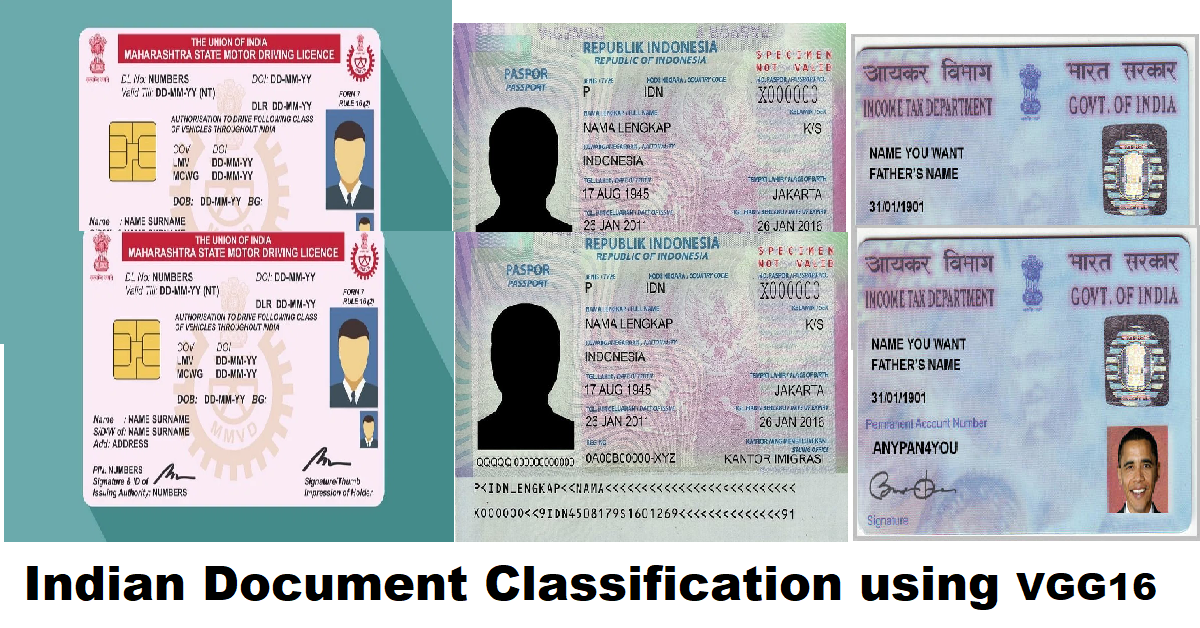

### Import packages and libraries

In [2]:
import os
import cv2
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Creating Dataset format

**Data Set** - 'https://drive.google.com/drive/folders/1mUr2EXCpQ3PGTOrhPo48orBZUavs-76-?usp=sharing'

In [3]:
IMG_SHAPE  = 224
batch_size = 32

In [4]:
#Training Data

train_dir = r'/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/Documents/Train'
#Training set
image_gen_train = ImageDataGenerator(rescale = 1./255)
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
                                                     directory = train_dir,
                                                     shuffle= True,
                                                     target_size = (IMG_SHAPE,IMG_SHAPE),
                                                     class_mode = 'categorical')

Found 45 images belonging to 3 classes.


In [5]:
train_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [6]:
train_data_gen.class_indices

{'Cheque': 0, 'Driving_License': 1, 'Pancard': 2}

In [7]:
#Test Data
test_dir = r'/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/Documents/Test'
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
                                                   directory=test_dir,
                                                   target_size=(IMG_SHAPE, IMG_SHAPE),
                                                   class_mode='categorical')

Found 12 images belonging to 3 classes.


In [8]:
test_data_gen.classes

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], dtype=int32)

In [9]:
test_data_gen.class_indices

{'Cheque': 0, 'Driving_License': 1, 'Pancard': 2}

### Download VGG-16 weights

In [10]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

In [11]:
## Freezing the training layer
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False 

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


### Modify last layer and add one max polling, one dense layer, one dropout, and one output with the last layer of VGG-16.


In [12]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

#Merge the layer to VGG-16
model = tf.keras.Model(pre_trained_model.input, x)

### Compile the model

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Train the model

In [17]:
vgg_classifier = model.fit(train_data_gen, epochs = 20, batch_size = 20, verbose = 1)

Epoch 1/20
2/2 [==============================] - 37s 7s/step - loss: 0.0154 - accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 28s 7s/step - loss: 0.0170 - accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 31s 21s/step - loss: 0.0135 - accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 36s 23s/step - loss: 0.0109 - accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 31s 20s/step - loss: 0.0146 - accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 32s 20s/step - loss: 0.0111 - accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 30s 20s/step - loss: 0.0125 - accuracy: 1.0000
Epoch 8/20
2/2 [==============================] - 30s 22s/step - loss: 0.0158 - accuracy: 1.0000
Epoch 9/20
2/2 [==============================] - 28s 7s/step - loss: 0.0094 - accuracy: 1.0000
Epoch 10/20
2/2 [==============================] - 31s 7s/step - loss: 0.0265 - accuracy: 1.0000
Epoch 11/20
2/2 [================

### Test the model on Test data

In [18]:
result = model.evaluate(test_data_gen,batch_size=30)
print("Test Loss : {}\nTest Accuracy : {}".format(result[0], result[-1]*100))

1/1 [==============================] - 10s 10s/step - loss: 0.0244 - accuracy: 1.0000
Test Loss : 0.024407939985394478
Test Accuracy : 100.0


### Predict the Document type for New data

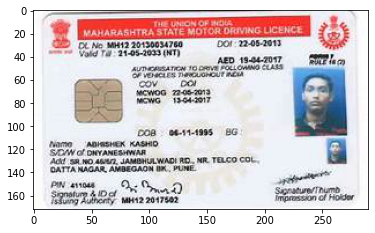

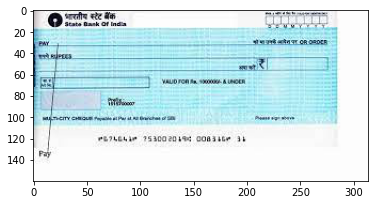

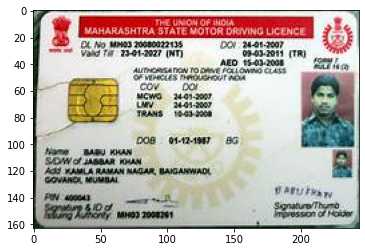

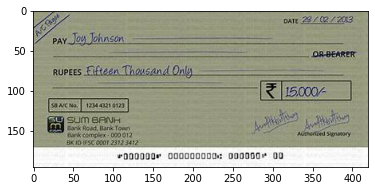

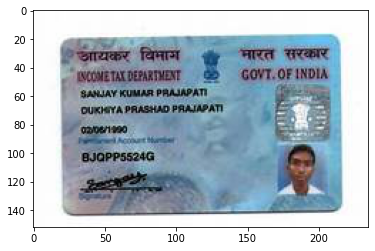

In [22]:
samp_dir='/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/Documents/Samples'
paths=[samp_dir+"/1.jpg", samp_dir+"/2.jpg", samp_dir+"/3.jpg", samp_dir+"/4.jpg", samp_dir+"/5.jpg"]

import matplotlib.pyplot as plt
for i in paths:
    plt.imshow(plt.imread(i))
    plt.show()

In [23]:
datagen=ImageDataGenerator(data_format=K.image_data_format())

samples=[]
def convert_to_image(X):
    '''Function to convert all Input Images to the STANDARD SIZE and create sample Dataset
    '''
    
    for f in paths:
        if os.path.isdir(f):
            continue
        img= PIL.Image.open(f)
        img =img.resize((IMG_SHAPE,IMG_SHAPE))
        img=np.array(img)
        samples.append(img)
        #print(X_train)
    #print(len(X_train))
    return samples
samples= np.array(convert_to_image(samples))
datagen.fit(samples)

In [24]:
predictions= model.predict(samples)

for i in range(len(predictions)):
    cls=np.argmax(predictions[i])
    if cls==0:
        print("Document type is Cheque")
    elif cls==1:
        print("Document type is Driving License")
    else:
        print("DOcument type is PanCard")

1/1 [==============================] - 3s 3s/step
Document type is Driving License
Document type is Cheque
Document type is Driving License
Document type is Cheque
DOcument type is PanCard


### Conclusion:
1. **Loaded Images and Rescalled and Reshaped the Images, perform Image Preprocessing.**
2. **Download VGG16 pretrained model.**
3. **Trained the model adding the New images.**
4. **Tested the model on Test Images.**
5. **Predicted the type of document for new Images.**